  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=e4ee82b2822123a25d099bc95560e7f3e03cea52b0ebe0b55bbb7c4d35ee6540
  Stored in directory: c:\users\rhuth\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [4]:
mnist=tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 29s 3us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

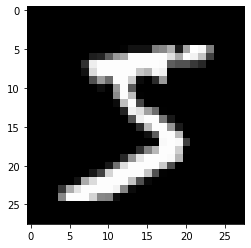

In [6]:
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

In [10]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2616 - accuracy: 0.9238
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0990 - accuracy: 0.9695
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0628 - accuracy: 0.9803
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0308 - accuracy: 0.9896
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0222 - accuracy: 0.9923
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0136 - accuracy: 0.9953
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

In [17]:
result=model.evaluate(x_test,y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.1286 - accuracy: 0.9774
[0.12857013940811157, 0.977400004863739]


In [18]:
model.save('mnist.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist.model\assets


In [19]:
new=tf.keras.models.load_model('mnist.model')

In [20]:
predict=new.predict(x_test)

In [21]:
predict

array([[9.4069138e-20, 1.4345926e-13, 9.2854912e-18, ..., 1.0000000e+00,
        1.0438365e-17, 6.2959910e-10],
       [1.3866063e-21, 5.8859401e-10, 1.0000000e+00, ..., 2.7538670e-19,
        2.0842156e-18, 6.0265066e-26],
       [5.1968263e-23, 1.0000000e+00, 1.0534185e-14, ..., 5.6427584e-12,
        2.0859986e-13, 2.0966625e-19],
       ...,
       [4.8135973e-24, 1.1122402e-16, 6.6966268e-22, ..., 1.1945001e-13,
        3.1327821e-16, 1.3763902e-14],
       [5.2938624e-18, 2.3006920e-15, 1.8792345e-20, ..., 2.9960330e-17,
        1.0701677e-12, 4.3663375e-19],
       [8.5324662e-16, 3.3159517e-17, 1.7775504e-17, ..., 8.0295241e-24,
        3.7416053e-16, 1.7328761e-21]], dtype=float32)

In [53]:
number=0
print(np.argmax(predict[number]))
print(y_test[number])


7
7
